# Import Libraries

In [1]:
!pip install plotly

In [2]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Import data from Github

In [3]:

url = 'https://github.com/Virementz/Hotel-Booking-Demand-Analysis-and-Cancelation-prediction/raw/main/hotel_bookings.csv'
df = pd.read_csv(url)


# Data Reading, Understanding & Cleaning

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.shape

(119390, 32)

In [7]:
df = df.drop_duplicates()
df.shape

(87396, 32)

Duplicated data has been drop from the data set to ensure a more precise model and eliminate outlier

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

as what can be seen from the info above, some dataset will need to be change into another datatype for a more convenient computation and classification. for example, we will change datatype of children from float to integer, while the agent from float to string, while at the same time, removing any null values (if any)

In [9]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


company feature has many null values. So this column can be dropped.

In [10]:
df=df.drop(columns='company')

For agent feature, we assume that null value means booking is done by guest themselves. So first we will look through unique values in agent feature then assign null values with a different value.

In [11]:
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

from the output above, we can see that there is no agent data segment that has value of 0. However, it is still good to double check

In [12]:
df[df['agent']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


no agent value that is equal to 0. Now we need to replace null values with 0 in agent feature.

In [13]:
df['agent'].fillna(value=0,inplace=True)

In [14]:
# To remove rows with null value
df = df.dropna(axis=0) 

In [15]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Now there are no null values.
Next step is to look for unique values in each feature by looping through features

In [16]:
for i in df.columns:
    print(i ,'has', df[i].unique(),'\n')

hotel has ['Resort Hotel' 'City Hotel'] 

is_canceled has [0 1] 

lead_time has [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364 324
  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100
  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65
  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108 106
  31  87  41 304 117  59  53  58 116  42 321  38 118  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133

next step is to convert datatype of children from float to integer

In [17]:
df.children= df.children.astype(int)
df.children.unique()

array([ 0,  1,  2, 10,  3])

now for agent datatype, we need to convert in from float to integer

In [18]:
#remove decimal
df.agent=df.agent.astype(int)

logically speaking, hotel usually cant be booked for children and babies. so we can drop that rows. Adults has value 0.

In [19]:
df = df[df['adults']!=0]

Now, we need to create 2 DataFrames, one for booking which are cancelled while the other are for when it's not cancelled

In [20]:
d = {'January':1, 'February':2, 'March':3, 'April':4,'May':5,'June':6,'July':7,
    'August':8,'September':9,'October':10,'November':11,'December':12}
df.arrival_date_month = df.arrival_date_month.map(d)

In [21]:
df_not_c =df[df['is_canceled']==0] #dataframe for bookings not cancelled
df_c = df[df['is_canceled']==1] #dataframe for bookings cancelled
df_not_c=df_not_c.drop('is_canceled',axis=1)
df_c=df_c.drop('is_canceled',axis=1,)

# Data Analysis (Q1-Q3 : Descriptive Analytics & Insight)

hotel vs number of guest

Text(0.5, 1.0, 'Hotel v No. of Guest')

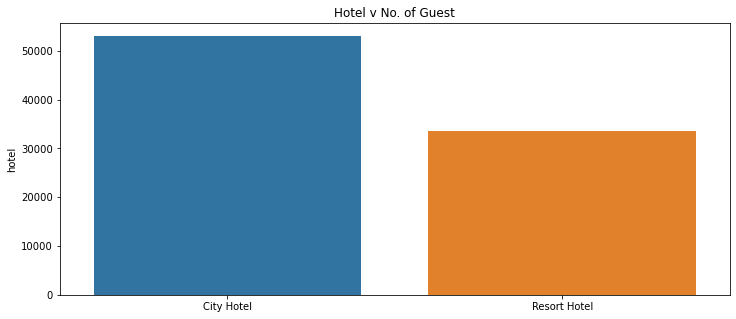

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.hotel.value_counts().index,y=df.hotel.value_counts())
plt.title('Hotel v No. of Guest')

Meal

In [23]:
px.pie(data_frame=df.meal.value_counts(),names=df.meal.value_counts().index,values=df.meal.value_counts(),title='Type of Meals ordered (proportion)')

Market Segment

In [24]:
px.pie(data_frame=df.market_segment.value_counts(),names=df.market_segment.value_counts().index,values=df.market_segment.value_counts(),title='Market Segment')

Distribution Channel

In [25]:
px.pie(data_frame=df.distribution_channel.value_counts(),names=df.distribution_channel.value_counts().index,values=df.distribution_channel.value_counts(),title='Distribution Channel')

Repeated Guest

In [26]:
print('Percentage of repeated guests ={}%'.format(len(df_not_c[df_not_c['is_repeated_guest']==1])*100/len(df_not_c)))

Percentage of repeated guests =4.945344291071571%


Room types

Text(0.5, 1.0, 'Reserved Room Type')

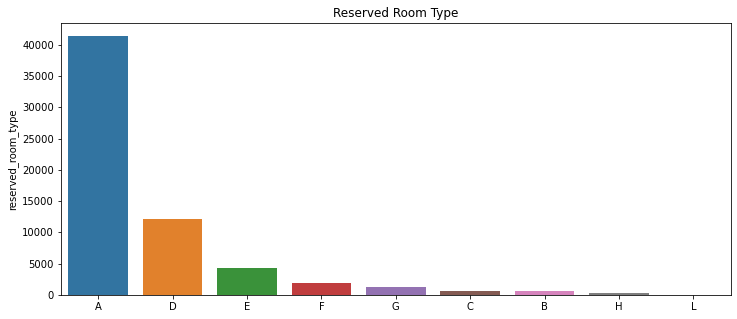

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_not_c.reserved_room_type.value_counts().index,y=df_not_c.reserved_room_type.value_counts())
plt.title('Reserved Room Type')

Text(0.5, 1.0, 'Assigned Room Type')

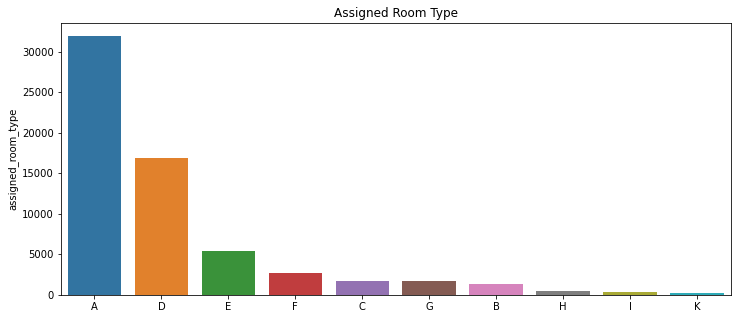

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_not_c.assigned_room_type.value_counts().index,y=df_not_c.assigned_room_type.value_counts())
plt.title('Assigned Room Type')

In [29]:
print('Proportion of bookings where assigned room type is not what was reserved room type=', len(df_not_c[df_not_c['reserved_room_type']!=df_not_c['assigned_room_type']])*100/len(df_not_c),'%')

Proportion of bookings where assigned room type is not what was reserved room type= 19.364876725444827 %


Deposit Type

In [30]:
df_not_c.deposit_type.value_counts()

No Deposit    62529
Refundable       81
Non Refund       55
Name: deposit_type, dtype: int64

Customer Type

In [31]:
px.pie(data_frame=df.customer_type.value_counts(),names=df.customer_type.value_counts().index,values=df.customer_type.value_counts(),title='Customer Type')

Country

In [32]:
df_country = df_not_c['country'].value_counts().reset_index()
df_country.columns = ['Country','No.of Guests']
df_country

,Country,No.of Guests
0,PRT,17542
1,GBR,8428
2,FRA,7071
3,ESP,5372
4,DEU,4322
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [33]:
px.choropleth(df_country,locations=df_country['Country'],color=df_country['No.of Guests'],
              hover_name=df_country['Country'],title='Home Country of Guests')

Hotel prices by months

In [34]:
df_resort = df_not_c[(df_not_c['hotel'] == 'Resort Hotel')]
df_city = df_not_c[(df_not_c['hotel'] == 'City Hotel')]

In [35]:
resort = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

combined=resort.merge(city, on = 'arrival_date_month')
combined.columns = ['month', 'resort price', 'city price']
combined

,month,resort price,city price
0,1,48.852694,83.729687
1,2,53.977059,88.324398
2,3,57.512456,91.334430
3,4,77.219541,114.368336
4,5,77.818102,124.837552
5,6,109.200465,120.697766
6,7,151.297719,120.346486
7,8,182.256818,123.023174
8,9,98.744746,116.957015
9,10,62.830638,105.594411


In [36]:
px.line(combined, x = 'month', y = ['resort price','city price'],
        title = 'Room price per night over the Months')

Busy Months

In [37]:
resort_m = df_resort['arrival_date_month'].value_counts().reset_index()
resort_m.columns=['month','no of guests']
resort_m

,month,no of guests
0,8,3133
1,7,2986
2,5,2234
3,10,2163
4,3,2138
5,4,2137
6,2,1999
7,6,1915
8,9,1850
9,11,1706


In [38]:
city_m = df_city['arrival_date_month'].value_counts().reset_index()
city_m.columns=['month','no of guests']
city_m

,month,no of guests
0,8,4446
1,7,3811
2,5,3648
3,6,3469
4,3,3463
5,4,3312
6,9,3162
7,10,3056
8,2,2606
9,11,2174


In [39]:
combined_m = resort_m.merge(city_m,on='month')
combined_m.columns=['month','no of guests in resort','no of guest in city hotel']
combined_m

,month,no of guests in resort,no of guest in city hotel
0,8,3133,4446
1,7,2986,3811
2,5,2234,3648
3,10,2163,3056
4,3,2138,3463
5,4,2137,3312
6,2,1999,2606
7,6,1915,3469
8,9,1850,3162
9,11,1706,2174


In [40]:
combined_m=combined_m.sort_values('month')

In [41]:
px.line(combined_m, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months')

# Data Pre-processing (Q4)

Remove/Drop columns that are not essential for analysis and computation

In [42]:
label = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
df.drop(labels=label,axis=1,inplace=True)

In [43]:
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,7,27,1,0,0,2,0,...,0,0,C,No Deposit,0,Transient,0.00,0,0,2015-07-01
1,Resort Hotel,0,737,7,27,1,0,0,2,0,...,0,0,C,No Deposit,0,Transient,0.00,0,0,2015-07-01
2,Resort Hotel,0,7,7,27,1,0,1,1,0,...,0,0,A,No Deposit,0,Transient,75.00,0,0,2015-07-02
3,Resort Hotel,0,13,7,27,1,0,1,1,0,...,0,0,A,No Deposit,304,Transient,75.00,0,0,2015-07-02
4,Resort Hotel,0,14,7,27,1,0,2,2,0,...,0,0,A,No Deposit,240,Transient,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,8,35,30,2,5,2,0,...,0,0,A,No Deposit,394,Transient,96.14,0,0,2017-09-06
119386,City Hotel,0,102,8,35,31,2,5,3,0,...,0,0,E,No Deposit,9,Transient,225.43,0,2,2017-09-07
119387,City Hotel,0,34,8,35,31,2,5,2,0,...,0,0,D,No Deposit,9,Transient,157.71,0,4,2017-09-07
119388,City Hotel,0,109,8,35,31,2,5,2,0,...,0,0,A,No Deposit,89,Transient,104.40,0,0,2017-09-07


Segmentation and segregration of dataframe into two categories: numerical and categorical data for the sake of easy control and data manipulation

In [44]:
cat_label=['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [45]:
cat_df = df[cat_label]
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [46]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [47]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06,2017,9,6
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07,2017,9,7
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07,2017,9,7
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07,2017,9,7


In [48]:
cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)

In [49]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7


Converting Features

In [50]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [51]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [52]:
num_df = df.drop(columns = cat_label, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,7,27,1,0,0,2,0,0,0,0,0,0,0.00,0,0
1,737,7,27,1,0,0,2,0,0,0,0,0,0,0.00,0,0
2,7,7,27,1,0,1,1,0,0,0,0,0,0,75.00,0,0
3,13,7,27,1,0,1,1,0,0,0,0,0,304,75.00,0,0
4,14,7,27,1,0,2,2,0,0,0,0,0,240,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,8,35,30,2,5,2,0,0,0,0,0,394,96.14,0,0
119386,102,8,35,31,2,5,3,0,0,0,0,0,9,225.43,0,2
119387,34,8,35,31,2,5,2,0,0,0,0,0,9,157.71,0,4
119388,109,8,35,31,2,5,2,0,0,0,0,0,89,104.40,0,0


In [53]:
num_df.var()

lead_time                          7405.514793
arrival_date_month                    9.555541
arrival_date_week_number            186.220567
arrival_date_day_of_month            78.056524
stays_in_weekend_nights               1.049666
stays_in_week_nights                  4.125836
adults                                0.377861
children                              0.200278
babies                                0.012925
is_repeated_guest                     0.037300
previous_cancellations                0.137048
previous_bookings_not_canceled        2.962229
agent                             12111.852271
adr                                3009.694782
required_car_parking_spaces           0.078853
total_of_special_requests             0.691541
dtype: float64

some column has distinguishly higher varience. So, there is a need for us to normalize and rescale them

In [54]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [55]:
num_df.var()

lead_time                         2.631912
arrival_date_month                9.555541
arrival_date_week_number          0.455235
arrival_date_day_of_month         0.513531
stays_in_weekend_nights           1.049666
stays_in_week_nights              4.125836
adults                            0.377861
children                          0.200278
babies                            0.012925
is_repeated_guest                 0.037300
previous_cancellations            0.137048
previous_bookings_not_canceled    2.962229
agent                             3.471362
adr                               0.614435
required_car_parking_spaces       0.078853
total_of_special_requests         0.691541
dtype: float64

In [56]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

# Constructing Machine Learning Models (Q4)

In [57]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Data split into traing set and test set

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=50)

Logistic Regresssion

In [60]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Decision Tree is : {acc_lr}")

Accuracy Score of Decision Tree is : 0.7993684534812077


<AxesSubplot:>

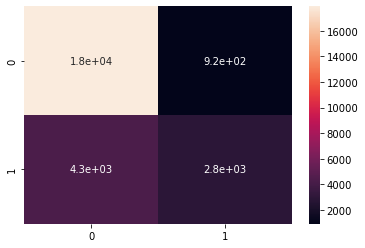

In [61]:
sns.heatmap(conf,annot=True)

In [62]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     18830
           1       0.76      0.40      0.52      7138

    accuracy                           0.80     25968
   macro avg       0.78      0.67      0.70     25968
weighted avg       0.79      0.80      0.78     25968



Classifier for Decision Tree

In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

Accuracy Score of Decision Tree is : 0.9344192852741836


<AxesSubplot:>

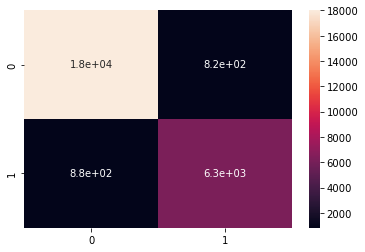

In [64]:
sns.heatmap(conf,annot=True)

In [65]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     18830
           1       0.88      0.88      0.88      7138

    accuracy                           0.93     25968
   macro avg       0.92      0.92      0.92     25968
weighted avg       0.93      0.93      0.93     25968



Random Forest Classifier

In [67]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")

Accuracy Score of Random Forest is : 0.9411198398028343


<AxesSubplot:>

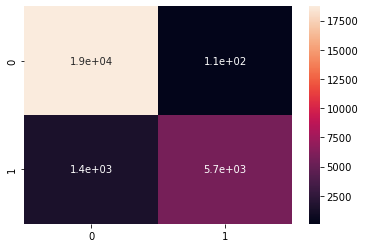

In [68]:
sns.heatmap(conf,annot=True)

In [69]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18830
           1       0.98      0.80      0.88      7138

    accuracy                           0.94     25968
   macro avg       0.96      0.90      0.92     25968
weighted avg       0.94      0.94      0.94     25968



In [70]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr,acc_dtc, acc_rd_clf]
})


models.sort_values(by ='Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.941120
1,Decision Tree Classifier,0.934419
0,Logistic Regression,0.799368


# Q1. Provide various descriptive analytics and insights

In [71]:
df.hotel.value_counts()


City Hotel      53048
Resort Hotel    33512
Name: hotel, dtype: int64

1. Hotel vs number of guests
- there seems to be higher number of guest in City Hotel (53 048 @ 62%) company to Resort Hotel (33 512 @ 38%) with a ratio difference of 24%

In [72]:
df.meal.value_counts()

BB           67278
SC            9387
HB            9047
Undefined      488
FB             360
Name: meal, dtype: int64

2. Type of Meals Ordered (proportion)
- Majority of guests which represent 77.7% (67 728) of population order BB as their meals while some small percentage of guest prder SC and HB respectively at 10.8% and 10.5% of total population. 
- There is a very little people who order FB as their type of meals while some of the guest, we cannot define their type of meals (488 guest in total)

In [73]:
df.market_segment.value_counts()

Online TA        51295
Offline TA/TO    13822
Direct           11594
Groups            4917
Corporate         4020
Complementary      686
Aviation           226
Name: market_segment, dtype: int64

3. Market Segment
- Half of the guest market segment comes from Online TA (59.3%) while Offline TA/TO and Direct represent 16% and 13.4% of market segment respectively
- there is small population of market segment from Groups and Corporate
- the remainder of market segment is made up of people from Aviation and Complementary

In [74]:
df.distribution_channel.value_counts()

TA/TO        68731
Direct       12761
Corporate     4886
GDS            181
Undefined        1
Name: distribution_channel, dtype: int64

4. Distribution Channel
- 68 731 or 79.4% of the Distribution Channel comes from TA/TO while there is small percentage of it comes from Direct (14.7%) and Corporate (5.64%)
-the rest is made up of small minority from GDS and Undefined

In [75]:
print('Percentage of repeated guests ={}%'.format(len(df_not_c[df_not_c['is_repeated_guest']==1])*100/len(df_not_c)))

Percentage of repeated guests =4.945344291071571%


5. Repeated guest
-4.95% of whole sample population is repeated guest which means there is a very small segment of customers who become repeated guest

In [76]:
df_not_c.reserved_room_type.value_counts()

A    41406
D    12113
E     4357
F     1960
G     1302
C      617
B      553
H      353
L        4
Name: reserved_room_type, dtype: int64

In [77]:
df_not_c.assigned_room_type.value_counts()

A    31926
D    16835
E     5434
F     2715
C     1746
G     1728
B     1312
H      453
I      342
K      174
Name: assigned_room_type, dtype: int64

In [78]:
print('Proportion of bookings where assigned room type is not what was reserved room type=', len(df_not_c[df_not_c['reserved_room_type']!=df_not_c['assigned_room_type']])*100/len(df_not_c),'%')

Proportion of bookings where assigned room type is not what was reserved room type= 19.364876725444827 %


6. Reserved room type
-41 406 from 62 665 or 66% guest reserved Room Type A
-some subsequent segment of guest reserved Room Type D which made up of 19% of guest
- there is a very small percentage of guest who reserved other room types
- However, there is quite a chunck of guest who reserved Room Type A who are assigned to another room type which totals up to 9480 guest
- a lot of guest are assigned to Room Type D and Room Type D instead of the reserved Room Type A
-Proportion of bookings where assigned room type is not what was reserved room type= 19.36 %

In [79]:
df.customer_type.value_counts()

Transient          71317
Transient-Party    11575
Contract            3134
Group                534
Name: customer_type, dtype: int64

7. Customer Type
-majority of Customer (82.4%) are Transient, followed by small representation from Transient-Party, Contract & Group

In [80]:
df_country = df_not_c['country'].value_counts().reset_index()
df_country.columns = ['Country','No.of Guests']
df_country

,Country,No.of Guests
0,PRT,17542
1,GBR,8428
2,FRA,7071
3,ESP,5372
4,DEU,4322
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


8. country
- PRT has highest number of guest (17542) followed by GBR (8428) and FRA (7071). It is also worth mentioning ESP and due made up quite a chunck representation of 5372 and 4322 respectively
- MDG, SLE, NAM,FRO & SMR has smallest number of guest out of 164 country in which there is only one (1) guest from the respective country each year

In [81]:
df_resort = df_not_c[(df_not_c['hotel'] == 'Resort Hotel')]
df_city = df_not_c[(df_not_c['hotel'] == 'City Hotel')]

In [82]:
resort = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

combined=resort.merge(city, on = 'arrival_date_month')
combined.columns = ['month', 'resort price', 'city price']
combined

,month,resort price,city price
0,1,48.852694,83.729687
1,2,53.977059,88.324398
2,3,57.512456,91.334430
3,4,77.219541,114.368336
4,5,77.818102,124.837552
5,6,109.200465,120.697766
6,7,151.297719,120.346486
7,8,182.256818,123.023174
8,9,98.744746,116.957015
9,10,62.830638,105.594411


In [83]:
px.line(combined, x = 'month', y = ['resort price','city price'],
        title = 'Room price per night over the Months')

9. Hotel prices by months
-relatively speaking, City Price is relatively higher than Resort Price through out the whole year with exception in Month of 7 & 8
-from the graph plot, we can see the price of Resorts Price starts to creeps up from Month 5 and exceed City Price on Months 7. However, price correction starts to happen during Month 9 before it return slowly return to baseline 

In [84]:
px.line(combined_m, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months')

10. Total number of guest per months
- generally speaking, there are alwasys higher number of guest in City Hotel company to Resort Hotel
- However, we can see there is spike in demand for both respective hotel starting from Month 6 before it reach its peak during Month 8
- Month 9 is when we start to see decline in number of guest again

In [85]:
df_not_c.deposit_type.value_counts()

No Deposit    62529
Refundable       81
Non Refund       55
Name: deposit_type, dtype: int64

11. Deposit Type
- there is small cases of refundable deposit (81 cases) while there is 55 non-refund cases

# Q2. Suggest the use cases suitable here from the perspective of the hotel owner?

- the hotel needs to do adequte preparation especially for peak season starting fro Month 6- Month 8

- if the hotel management is concerned about the spike in demand will result in full capacity operation, there is some mitigation measures that can be taken in order to dissipate some of the demand to avoid oveflowing

- for example, the hotel owner can provide a more attractive discount and deals during the non-peak season which based on our data analysis, usually happen at the beginning and the end of the year to attract more guest during off-peak season

- this will allow for a more uniform guest distribution through out the year
- at the same time, it also allows the hotel owner to have a steady stream of sales and incomes in which it will results in better cash flow management

- correction of cash flow will allow the hotel owner to do business expansion or investment that bring significant return of investment to the hotel owner

- it also looks good on account book of the business owner, in case there is a need for audit of the Hotel Owner's company

- it is also easier to plan for tax relief program with a steady cash flow and steady stream of customer through out the whole year which will prevent the hotel owner to have deficit in certain months

-the hotel owner can further improve the sales of the hotel by doing a custom and specific campaign to attract guest from country with the least amount of guest such as MDG, SLE, NAM, FRO & SMR

-the hotel can also give incentive to country with highest number of guest such as PRT, GBR, FRA, ESP & DEU in order to retain customer and build a healty networking

-the hotel owner also need to cater more to Transient and Transient-Party Customer as they made up of the majority of the market for the total number of guest

- there is a very small cases of refund and non refund. Eventhough it doesnt seems like major issue, it's good to blast a survey form to this customer to determine exactly the reason for refund and non refund in order to improve more on the overall customer experience and avoid future issue when the hotel owner plan to expand

-there is a lot of issue in which the assigned room is not the same as the reserved room. this problem need to be issued properly to avoid the hotel to be flooded from bad review and to uphold the reputation of the hotel. we need to determine what exactly causes the mismatch in the assigned and reserved room type and address the issue accordingly.

-if the mismatch is due to limited capacity, we need to tweak the booking system to only accept booking up until certain level. if the mismatch is due to peak seasos, the hotel owner can dissipate the demand by offering great deals during non-peak season

- there is only 4.95% repeated guest. the hotel owner need to study further what exactly cause this figure? is the price too high for the guest to afford repeated time? or does the guest find the experience at the hotel unpleasant to the point that they dont feel like coming again? or is the location made it higly non-accesible for the guest to come frequently?

-Majority of distribution channel come from TA/TO. the hotel owner needs to pay extra attention to this segment as they made up of 79.4% of total market segment which means they contribute the highest revenue to the hotel. 

- Majority of market segment, more than half of it (59.3%) are made of Online TA. the hotel owner needs to make sure that the system are running smoothly and provide good booking experience to this group

-majority of meals ordered by customer is BB. the owner can collet data on customer satisfaction in order to determine what exactly make BB such a successful meal type which allows it to thrive at 77.7& of the whole proportion. and with enough data, maybe we can take the stratergy and features from BB and implement it towards other meals type in order to provide a more  meaningful diversity of choices that are pleasant to the guest

- a lot of the customers prefer city hotel rather than resort hotel. this need more data collection in order to determine exactly why the guest prefer this one from another. From there, we can apply the stratergy of success of City Hotel to boost the sales for Resort Hotel

# Q3. Suggest the use cases suitable here from the perspective of the guests?

-there is higher number of guest in City Hotel. depending on the guest, we can suggest different choices based on customer preference. 

for example, if the customer is the type that dislike crowded places and prefer the view of nature while at the same time want to have a vacation with minimall risk of getting Covid, we can suggest Resort Hotel that is proven to has smaller number of guest

however, some guests prefer the view of the city and to get to know new person and met new acquantance, then city hotel is the more suitable choices for them

a lot of guest ordered BB meals compare to other type of meals. it's good for the guest to select the same meals to explore exactly what makes BB meals so popular compare to another meal and for them to have immersive experience of the hotel

as majority of market segment is from Online TA, it is safe to say that the other guest to also do the same as it is more convenient and easier to do.

majority of distribution channel is made up of TA/TO. this means that booking the hotel through Travel Agency (TA) or Travel Office is better as they may be able to provide better deals. Besides, you will have someone to consult and recommend to you the best place and the best meal as they are well versed with the travel destination

there is a very small number of repeated guest for this hotel. its better for the guest or the customer to make extensive research about the hotel to find out exactly the reason why there is such a low number of repeated guest. is it because the price is too high for it to be repeatable, is the service bad, or does it locate it remote location, making it not easily aceesible? it's good idea to look up review of the hotel and travel destination online to prepare for worst cases scenario

there is a lot of cases in which customer who reserved room type A were assigned to another room type. to avoid this, i think it is better for us to book in advance if we still want Room Type A. for the peace of mind, it is also advisable for us as guest to book other room type that are equally or more comfortable at higher price point to ensure peace of mind and smooth vacation

there is very small number of request for deposit refund. and it also seems that majority of customer booking with no deposit. i think its safe to say that booking with no deposit is accetable. however, if there is certain kind of hotel room or hotel view that the guest prefer, i think it's better if we put down some kind of deposit as the hotel management will prioritise these hotel rooms to the one who has reservation and already paid down their deposit

there is a lot of transient customer which a lot of them dont stay at the hotel for long duration. it is good to plan the vacation propperly with solid itenary so that we dont prolong our stay at the hotel which will cost us a lot more money

there is a lot of customer from PRT, GBR, FRA, ESP and DEU. if you as a guest want to avoid overcrowding, i think its best to suggest that to book the hotel during off-season in which those countries are not on holiday. However, it is a different cases if the guest are from those respective countries.

there is spike of hotel price, especially for the resort hotel from month 6-8. if you want to save more money, i think its best to book the hotel during the off-peak season as there is significant difference in the price, provided that the guest are available during that period. however,there is no much variation with hotel in the City. So it is safe to say that you can book the City hotel whenever throughout the whole year as there is very small difference in price.

busy month for both city hotel and resort hotel are starting from Month 6-Month 8. if you dont like crowded place, i would suggest to book the hotel during the off-peak season either earlier of the year or at the end of the year 



# Q4. Develop a model to predict bookings cancellation and explain the model as well as it’s output.

Random Forest Classifier has accuracy of 94%, with weighted precision and recall of 94% which is great.

Random Forests tend to have high accuracy prediction (challenge C2) and can handle large numbers of features (C1) due to the embedded feature selection in the model generation process. Note that when the number of features is large, it is preferable to use a higher number of regression trees.

a good accuracy score for random forest is 92.49 %. 
our model has Accuracy of 94.00 %. The random forest trained on the single year of data was able to achieve an average absolute error of 4.3 degrees representing an accuracy of 94.00% on the expanded test set

How to improve the model?

1.Use more (high-quality) data and feature engineering
2.Tune the hyperparameters of the algorithm
3.Try different algorithms